<h1><b>GROUP 3</b></h1>
<h2>Members:</h2>
<h4>Antonio Julian Recto</h4>
<h4>Gaerlan John Gutierrez</h4>
<h4>John Robynn Hernandez</h4>
<h4>Patrick Pangilinan</h4>
<h4>Rob Ian Dimaculangan</h4>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# From the dataset, we have the following columns:
# class: Whether the patient had a recurrence of breast cancer or not
# age: The age range of the patient
# menopause: The menopause status of the patient (premeno: before menopause; ge40: using hormone replacement therapy to treat menopause symptoms; lt40: premature menopause at an age less than 40)
# tumor-size: The size range of the tumor
# inv-nodes: The number of invovled auxiliary nodes
# node-caps: Whether the tumor had capsular penetration or not
# deg-malig: The degree of malignancy of the tumor (1-3)
# breast: The breast on which the tumor was located (left or right)
# breast-quad: The quadrant of the breast in which the tumor was located
# irradiat: Whether the patient received radiation therapy or not

# Loading the data set
data_path = "breast-cancer.csv"
cancerdf = pd.read_csv(data_path)
cancerdf.head()

,class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
# Drop null rows
cancerdf = cancerdf.replace('?', np.nan)
cancerdf = cancerdf.dropna()

In [ ]:
# The dataframe has 277 rows and 10 columns
cancerdf.shape

(277, 10)

In [ ]:
# All columns have 277 non-NA/null values, which means that there are no missing values in the dataframe
cancerdf.count()

class          277
age            277
menopause      277
tumor-size     277
inv-nodes      277
node-caps      277
deg-malig      277
breast         277
breast-quad    277
irradiat       277
dtype: int64

In [ ]:
# This function is only showing the statistics for the "deg-malig" column because it is the only numerical column, not in a string form in the dataframe.
# With that being said, it shows that there are 277 observations in the column, with a mean of 2.057762,
# a standard deviation of 0.729989, a minimum value of 1, a maximum value of 3, and the 25th, 50th, and 75th percentiles are 2.000000, 2.000000, and 3.000000 respectively.
# It can also be inferred that the most common value in the column is 2.
cancerdf.describe()

,deg-malig
count,277.000000
mean,2.057762
std,0.729989
min,1.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,3.000000


In [ ]:
# 1. What is the most prominent number of involved auxillary nodes among patients with recurrent cancer?
# Filter the dataset for rows where class is 'recurrence-events'
top_3_inv = cancerdf[cancerdf['class'] == 'recurrence-events']

# Use the value_counts() method to determine the frequency of each inv-nodes
inv_counts = top_3_inv['inv-nodes'].value_counts()

# Get the top 3 inv-nodes range
top_3_inv = inv_counts.head(3)

# Create a table to show the top 3 inv-nodes
table = top_3_inv.to_frame()
table.reset_index(inplace=True)
table.columns = ['inv-nodes', 'Frequency']
print(table)

# This shows that the most common inv-nodes value is 0-2, with 43 occurrences, followed by 3-5 with 17 occurrences, and 6-8 with 10 occurrences.
# It is also possible to infer that most of the patients in this dataset have 0-2 involved auxiliary nodes. 

  inv-nodes  Frequency
0       0-2         43
1       3-5         17
2       6-8         10


In [ ]:
# 2. How many patients with recurrent cancer have premenopause status vs non-recurrent patients?
# Count the number of patients with recurrence-events that have premenopause status
rec_count = cancerdf[(cancerdf["class"] == "recurrence-events") & (cancerdf["menopause"] == "premeno")].shape[0]

# Count the number of patients with non-recurrence-events that have premenopause status
non_rec_count = cancerdf[(cancerdf["class"] == "no-recurrence-events") & (cancerdf["menopause"] == "premeno")].shape[0]

# Create a table to compare the counts
table = pd.DataFrame({"Patient Type": ["Recurrent w/ Premenopause", "Non-Recurrent w/ Premenopause"], "Count": [rec_count, non_rec_count]})

# Print the table
print(table)

# This indicates that there are 48 patients in the recurrent group and 101 patients in the non-recurrent group who have premenopause status.
# It can be said that there are less occurrences of premenopause in patients that have recurrent cancer, which may have potential implication on the chances
# of having recurrent cancer

                    Patient Type  Count
0      Recurrent w/ Premenopause     48
1  Non-Recurrent w/ Premenopause    101


In [ ]:
# 3. In which side does breast cancer occur among patients with non-recurrent cancer vs patients with recurrent cancer?
# Create a pivot table to display the data
pivot_table = cancerdf.pivot_table(index='class', columns='breast', aggfunc='size')

# Display the pivot table
print(pivot_table)

# The output shows that there are 100 occurrences of breast cancer on the left side and 96 occurrences on the right side among patients with non-recurrent cancer.
# On the other hand, there are 45 occurrences of breast cancer on the left side and 36 occurrences on the right side among patients with recurrent cancer.
# Overall, it seems that breast cancer is more common on the left side, with 145 occurrences, and 132 occurrences on the right side in total.

breast                left  right
class                            
no-recurrence-events   100     96
recurrence-events       45     36


In [ ]:
# 4. What is the most common age range for patients with non-recurrent cancer vs patients with recurrent cancer?
# Create a new column and dataframe for age ranges 
cancerdf_age = cancerdf
cancerdf_age['age_range'] = cancerdf['age'].apply(lambda x: x.split("-")[0] + "-" + x.split("-")[1])

# Group the data by recurrence and age range
grouped = cancerdf_age.groupby(['class', 'age_range']).size().reset_index(name='counts')

# Get the top 3 age ranges for non-recurrent cancer
non_recurrent = grouped[grouped['class'] == 'no-recurrence-events'].sort_values(by='counts', ascending=False).head(3)

# Get the top 3 age ranges for recurrent cancer
recurrent = grouped[grouped['class'] == 'recurrence-events'].sort_values(by='counts', ascending=False).head(3)

print("Top 3 age ranges for non-recurrent cancer:")
print(non_recurrent)

print("\nTop 3 age ranges for recurrent cancer:")
print(recurrent)

# The output shows the top 3 age ranges for patients with non-recurrent cancer and recurrent cancer. 
# The table shows that for patients with non-recurrent cancer, the most common age range is 50-59 with a count of 69, followed by 40-49 with a count of 62, and then 60-69 with a count of 38.
# For patients with recurrent cancer, the most common age range is 40-49 with a count of 27, followed by 50-59 with a count of 22, and then 60-69 with a count of 17.
# This suggests that the age range of 40-49 is the most common among patients with recurrent cancer, while the age range of 50-59 is the most common among patients with non-recurrent cancer.

Top 3 age ranges for non-recurrent cancer:
                  class age_range  counts
3  no-recurrence-events     50-59      69
2  no-recurrence-events     40-49      62
4  no-recurrence-events     60-69      38

Top 3 age ranges for recurrent cancer:
               class age_range  counts
7  recurrence-events     40-49      27
8  recurrence-events     50-59      22
9  recurrence-events     60-69      17


In [ ]:
# ONE-HOT ENCODE THE CATEGORICAL VARIABLES
# Get the column names of dataframe
columns = cancerdf.columns.tolist()
# Remove the column to not one-hot encode
columns.remove('class')
# One-hot encode all columns except 'class'
cancerdf_encoded = pd.get_dummies(cancerdf, columns=columns)

# Replace "no-recurrence-events" with 0 and "recurrence-events" with 1
cancerdf_encoded["class"] = cancerdf_encoded["class"].replace("no-recurrence-events", 0).replace("recurrence-events", 1)
cancerdf_encoded.head()

,class,age_20-29,age_30-39,age_40-49,age_50-59,age_60-69,age_70-79,menopause_ge40,menopause_lt40,menopause_premeno,...,breast-quad_right_low,breast-quad_right_up,irradiat_no,irradiat_yes,age_range_20-29,age_range_30-39,age_range_40-49,age_range_50-59,age_range_60-69,age_range_70-79
0,0,0,1,0,0,0,0,0,0,1,...,0,0,1,0,0,1,0,0,0,0
1,0,0,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
3,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,0,0,1,0,0,0,0,0,1,...,1,0,1,0,0,0,1,0,0,0


In [ ]:
# Divide the data frame into input and output
X = cancerdf_encoded.drop('class', axis=1)
Y = cancerdf_encoded['class']

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.3)

In [ ]:
# Import necessary libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.python.keras import layers
from tensorflow.python.keras.layers import Dropout

In [ ]:
# Import regularizers
from tensorflow.python.keras import regularizers
# Create the model
model = keras.Sequential()
# Create a dense layer with 32 nodes using relu activation and a kernel regularizer to lower overfitting
model.add(layers.Dense(32, kernel_regularizer=regularizers.l1(0.01), activation='relu'))
# Create a dropout layer with a dropout rate of 0.5 to prevent overfitting
model.add(Dropout(0.5))
# Use a sigmoid function for the classification of two classes, recurrence-events or no-recurrence-events
model.add(layers.Dense(1,activation='sigmoid'))

In [ ]:
from tensorflow.python.keras.callbacks import EarlyStopping

# Implement early stop to monitor if the loss isn't improving after 10 epochs which helps to prevent overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

# Compile and train the model with binary cross entropy for loss function and adam optimizer
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Use 300 epochs, using the xtest and ytest as validation data to better show the accuracy and callback to the early_stop function
history = model.fit(xtrain, ytrain, epochs=300, validation_data=(xtest, ytest), callbacks=[early_stop])

Epoch 1/300
7/7 [==============================] - 1s 68ms/step - loss: 0.7513 - accuracy: 0.5130 - val_loss: 0.7480 - val_accuracy: 0.4524
Epoch 2/300
7/7 [==============================] - 0s 18ms/step - loss: 0.7077 - accuracy: 0.5596 - val_loss: 0.7054 - val_accuracy: 0.6548
Epoch 3/300
7/7 [==============================] - 0s 12ms/step - loss: 0.7000 - accuracy: 0.5699 - val_loss: 0.6729 - val_accuracy: 0.6905
Epoch 4/300
7/7 [==============================] - 0s 12ms/step - loss: 0.6699 - accuracy: 0.5959 - val_loss: 0.6461 - val_accuracy: 0.7500
Epoch 5/300
7/7 [==============================] - 0s 25ms/step - loss: 0.6546 - accuracy: 0.6373 - val_loss: 0.6253 - val_accuracy: 0.7619
Epoch 6/300
7/7 [==============================] - 0s 16ms/step - loss: 0.6844 - accuracy: 0.6114 - val_loss: 0.6099 - val_accuracy: 0.7738
Epoch 7/300
7/7 [==============================] - 0s 16ms/step - loss: 0.6690 - accuracy: 0.6010 - val_loss: 0.5938 - val_accuracy: 0.7738
Epoch 8/300
7/7 [===

In [ ]:
# The output shows that the final loss and accuracy of the test set was 0.4765 and 0.8571 respectively.
# An accuracy of 0.8571 means that 85.71% of the instances in the test set were correctly classified by the model. This can be considered as a good performance for the model
# Evalute the test sets
model.evaluate(xtest, ytest)

3/3 [==============================] - 0s 6ms/step - loss: 0.4765 - accuracy: 0.8571


[0.4765106737613678, 0.8571428656578064]

In [ ]:
# From this output, it shows that the model is performing well on the training set with an accuracy of 0.8135 and a loss of 0.4506
# This indicates that the model has not overfitted to the training data and should generalize well to new unseen data
# Evalute the training sets
model.evaluate(xtrain,ytrain)

7/7 [==============================] - 0s 3ms/step - loss: 0.4506 - accuracy: 0.8135


[0.4506348669528961, 0.8134714961051941]

In [ ]:
# Initialize the confusion matrix
import sklearn
from sklearn.metrics import confusion_matrix
ypred = (model.predict(xtest)>0.50).astype('int32')

3/3 [==============================] - 0s 6ms/step


In [ ]:
# In this output, 62 is the number of true positives, 4 is the number of false positives, 8 is the number of false negatives, and 10 is the number of true negatives.
# From this output, it can be said that the model has a good performance in terms of identifying true positives but has less accuracy with false negatives
# Call the confusion matrix to test the results
confusion_matrix(ytest, ypred)

array([[62,  4],
       [ 8, 10]])

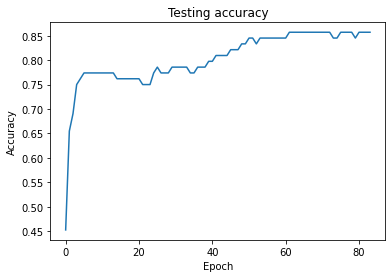

In [ ]:
# From this plot, we can see that the testing accuracy starts form 0.45 and spikes up in between 0.80 and 0.75
# As the epochs rise, the accuracy also gradually rises ultimately ending in 0.85 which is a good sign showing that the model improves as it reiterates
# Plot the training accuracy
plt.plot(history.history['val_accuracy'])
plt.title('Testing accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

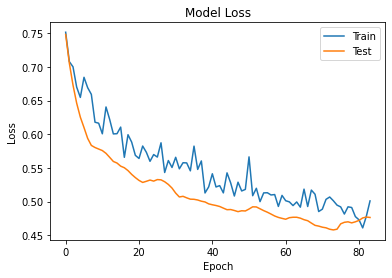

In [ ]:
# From this graph, we can see that the training and testing sets have similar levels of loss and continually decreasing as it goes through more epochs
# It can be inferred that there is minimal overtfitting with the dataset, suggesting an acceptable level of accuracy to the data
# Plotting the loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [ ]:
# To summarize all the findings, the column "deg-malig" has a mean of 2.05 and a standard deviation of 0.73, indicating that the majority of the tumors are moderately malignant.
# The column "inv-nodes" has a majority of cases (43 out of 77) with 0-2 involved nodes. There are more non-recurrent cancer cases (101) than recurrent cancer cases (48) among patients with premenopause status.
# Breast cancer occurs more frequently on the left side among both non-recurrent and recurrent cancer cases. The most common age range for patients with non-recurrent cancer is 50-59, followed by 40-49 and 60-69.
# The most common age range for patients with recurrent cancer is 40-49, followed by 50-59 and 60-69. Evaluation of the test set has an accuracy of 85.71%. Evaluation of the training set has an accuracy of 81.35%.
# Lastly, the confusion matrix shows 62 true positives, 10 true negatives, 8 false positives and 4 false negatives.